In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

##Algerian Forest Fires Dataset Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into fire(1

##Attribute Information:

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42 RH : Relative Humidity in %: 21 to 90 Ws :Wind speed in km/h: 6 to 29 Rain: total day in mm: 0 to 16.8 FWI Components Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 Drought Code (DC) index from the FWI system: 7 to 220.4 Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 Buildup Index (BUI) index from the FWI system: 1.1 to 68 Fire Weather Index (FWI) Index: 0 to 31.1 Classes: two classes, namely Fire and not Fire

In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [6]:
# Encoding
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)

In [7]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [8]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [9]:
#Independent Features and dependent features
X=df.drop('FWI',axis=1)
Y=df['FWI']

In [10]:
X.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [12]:
Y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [13]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [14]:
X_train,X_test,Y_train,Y_test

(     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI  \
 97     6      9  2012           29  74  19   0.1  75.8   3.6  32.2   2.1   
 141   20      6  2012           31  72  14   0.2  60.2   3.8   8.0   0.8   
 192   11      8  2012           40  31  15   0.0  94.2  22.5  46.3  16.6   
 68     8      8  2012           32  60  18   0.3  77.1  11.3  47.0   2.2   
 119   28      9  2012           32  47  14   0.7  77.5   7.1   8.8   1.8   
 ..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...   ...   
 106   15      9  2012           24  82  15   0.4  44.9   0.9   7.3   0.2   
 14    15      6  2012           28  80  17   3.1  49.4   3.0   7.4   0.4   
 92     1      9  2012           25  76  17   7.2  46.0   1.3   7.5   0.2   
 179   29      7  2012           34  59  16   0.0  88.1  19.5  47.2   7.4   
 102   11      9  2012           30  77  21   1.8  58.5   1.9   8.4   1.1   
 
       BUI  Classes  Region  
 97    5.6        0       0  
 141   3.7    

In [15]:
X_train.shape,X_test.shape

((182, 14), (61, 14))

In [16]:
## Feature Selection based on correlaltion
X_train.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
day,1.000000,-0.030327,NaN,0.082147,-0.072161,0.043611,-0.073855,0.253695,0.496505,0.540581,0.190732,0.529327,0.244289,0.019528
month,-0.030327,1.000000,NaN,-0.015272,-0.031036,-0.037508,0.008632,-0.006620,0.053308,0.121493,0.076010,0.074529,0.005476,-0.014930
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.082147,-0.015272,NaN,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.072161,-0.031036,NaN,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,0.043611,-0.037508,NaN,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.073855,0.008632,NaN,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.253695,-0.006620,NaN,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.496505,0.053308,NaN,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.540581,0.121493,NaN,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838


# Feature selection

<AxesSubplot:>

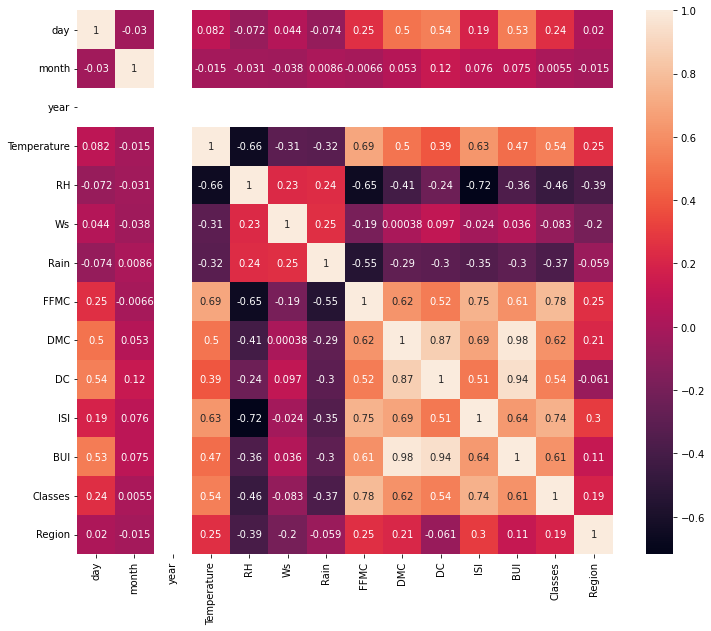

In [17]:
## Check for Multicolinearity

plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [18]:
X_train.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
day,1.000000,-0.030327,NaN,0.082147,-0.072161,0.043611,-0.073855,0.253695,0.496505,0.540581,0.190732,0.529327,0.244289,0.019528
month,-0.030327,1.000000,NaN,-0.015272,-0.031036,-0.037508,0.008632,-0.006620,0.053308,0.121493,0.076010,0.074529,0.005476,-0.014930
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.082147,-0.015272,NaN,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.072161,-0.031036,NaN,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,0.043611,-0.037508,NaN,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.073855,0.008632,NaN,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.253695,-0.006620,NaN,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.496505,0.053308,NaN,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.540581,0.121493,NaN,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838


In [19]:
def correlation(dataset,threshold):
    col_corr = set()  ## it is a variable so that repeated values na aaye
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [20]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [21]:
corr_features

{'BUI', 'DC'}

In [22]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 12), (61, 12))

#Feature Scaling Or Standardization

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [1]:
X_train_scaled

NameError: name 'X_train_scaled' is not defined

#Box Plots To understand Effect Of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

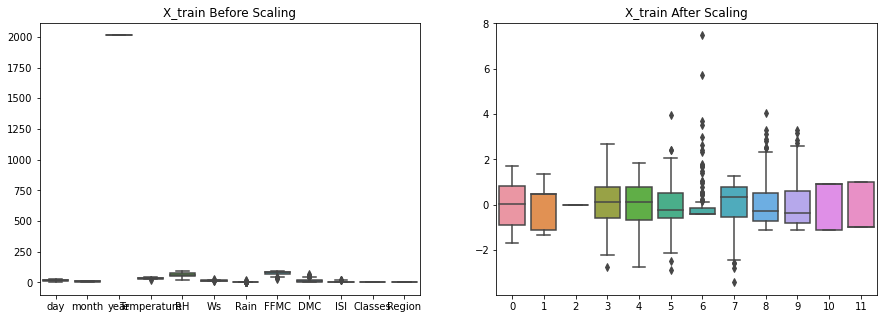

In [25]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

# Linear Regression Model

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,Y_train)
Y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5796315075744046
R2 Score 0.9837888473078155


# Lasso Regression

In [29]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,Y_train)
Y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.1331759902742848
R2 Score 0.9492020277152008


# Ridg regression

In [30]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,Y_train)
Y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5991395275398743
R2 Score 0.9831604230861805


# Elasticnet Regression

In [31]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,Y_train)
Y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.85587828572771
R2 Score 0.8760305780807829


In [32]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))